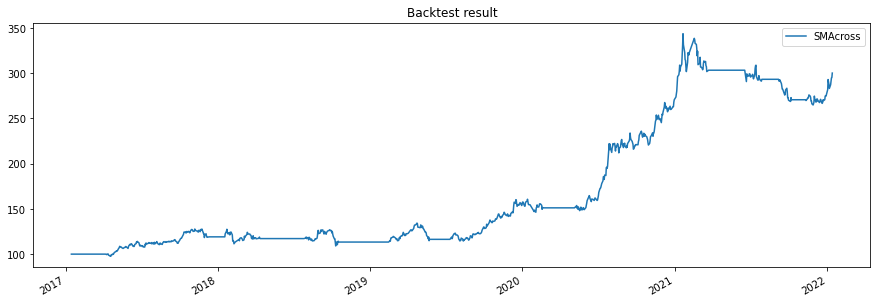

Stat                 SMAcross
-------------------  ----------
Start                2017-01-15
End                  2022-01-14
Risk-free rate       0.00%

Total Return         200.19%
Daily Sharpe         1.31
Daily Sortino        2.23
CAGR                 24.61%
Max Drawdown         -22.93%
Calmar Ratio         1.07

MTD                  9.27%
3m                   10.89%
6m                   -2.66%
YTD                  9.27%
1Y                   -0.71%
3Y (ann.)            38.34%
5Y (ann.)            24.61%
10Y (ann.)           -
Since Incep. (ann.)  24.61%

Daily Sharpe         1.31
Daily Sortino        2.23
Daily Mean (ann.)    24.50%
Daily Vol (ann.)     18.75%
Daily Skew           0.41
Daily Kurt           6.85
Best Day             9.97%
Worst Day            -6.76%

Monthly Sharpe       1.10
Monthly Sortino      3.16
Monthly Mean (ann.)  24.35%
Monthly Vol (ann.)   22.09%
Monthly Skew         2.57
Monthly Kurt         12.96
Best Month           35.94%
Worst Month          -10.04%



In [3]:
import bt
import pandas as pd
import matplotlib.pyplot as plt

#直接顯示圖示
%matplotlib inline

# 載入股票資料
data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\2330.TW.csv',index_col=0,parse_dates=True)

#轉換資料類型
data_c = data['Close'].to_frame().dropna()

# 計算兩條不同時間的均線
sma = data_c.rolling(20).mean()
sma2 = data_c.rolling(50).mean()

# 定義交易策略
bt_strategy = bt.Strategy('SMAcross', 
                          [bt.algos.SelectWhere(sma > sma2),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, data_c)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

bt_result.display()

In [2]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA
import talib

#載入過去五年0056的每日收盤數據
data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\0056.TW.csv',index_col=0,parse_dates=True)

#定義均線策略20天短均線超過50天均線即作多
class SmaCross(Strategy):
    n1 = 20
    n2 = 50

    def init(self):
        close = self.data['Close']
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)
        
#均線策略20天短均線超過50天均線即作多，不做空    
    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        #elif crossover(self.sma2, self.sma1):
           # self.sell()


#設定初始資金為10萬，交易手續費為0.1425%
bt = Backtest(data, SmaCross,
              cash=100000, commission=0.001425,
              exclusive_orders=True)

#將交易結果繪成圖表
output = bt.run()
bt.plot()

#統計交易的數據
stats = bt.run()
stats

C:\Users\npc94\anaconda3\lib\site-packages\backtesting\_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

Start                     2017-01-17 00:00:00
End                       2022-01-14 00:00:00
Duration                   1823 days 00:00:00
Exposure Time [%]                   93.109106
Equity Final [$]                130637.619152
Equity Peak [$]                 142446.958128
Return [%]                          30.637619
Buy & Hold Return [%]               41.424917
Return (Ann.) [%]                    5.680394
Volatility (Ann.) [%]               14.162531
Sharpe Ratio                         0.401086
Sortino Ratio                        0.543774
Calmar Ratio                         0.225908
Max. Drawdown [%]                  -25.144677
Avg. Drawdown [%]                   -3.061426
Max. Drawdown Duration      381 days 00:00:00
Avg. Drawdown Duration       48 days 00:00:00
# Trades                                   15
Win Rate [%]                        73.333333
Best Trade [%]                      19.449402
Worst Trade [%]                    -11.266342
Avg. Trade [%]                    